# FEATURE SELECTION FOR DETERMINING DIABETES RISK FACTORS (6 VARIATIONS)

## Research Work Implementation

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_selection import mutual_info_classif
import time
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import manifold, neighbors
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

### Check Quality of Data

In [139]:
data = pd.read_csv('d3.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [141]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)

number of rows/entries: 253680
number of columns 22


In [142]:
duplicate = data[data.duplicated()].shape[0]
missing_entry = data.isnull().sum().sum()
print("Duplicate Overall Values are:", duplicate)
print("Missing Overall Values are:", missing_entry)

missing_entries = data.isnull().any()
print("Missing Values: \n",missing_entries)

Duplicate Overall Values are: 24206
Missing Overall Values are: 0
Missing Values: 
 Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


#### Removing present duplicates

In [143]:
data = data.drop_duplicates()
# After deciding if rows with this value missing should be imputed or dropped
duplicate_after = data[data.duplicated()].shape[0]

In [144]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)
print("Duplicate Overall Values are:", duplicate_after)

number of rows/entries: 229474
number of columns 22
Duplicate Overall Values are: 0


#### Visualizing the percentage of Diabetic patients to Non-diabetic patients

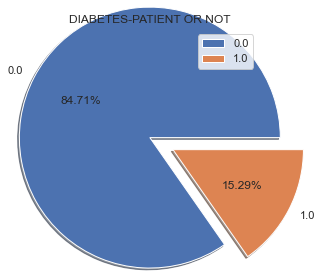

In [159]:
plt.pie(data["Diabetic"].value_counts(),labels = data["Diabetic"].unique(),autopct = "%.2f%%",shadow=True,explode=(0,0.3),radius=1.5);
plt.title("DIABETES-PATIENT OR NOT")
plt.legend()
plt.show()

#### Ploting a histogram for correlation only for features
Here we are again going to create a mask as we created before and then arrange mask into a triangular shape and then create a data frame of correlation with the mask

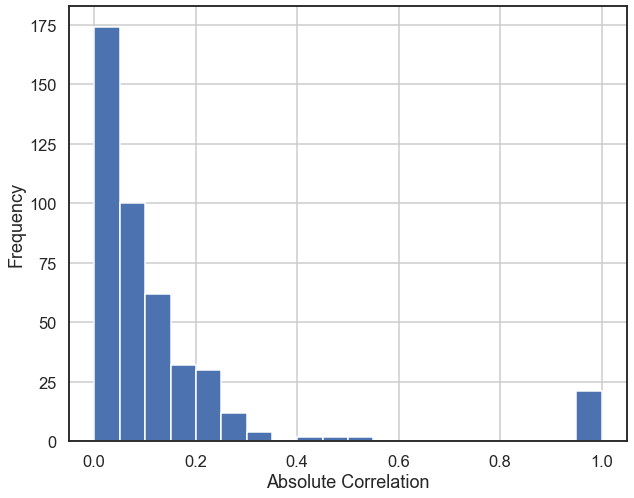

In [145]:
features_cols = data.columns[:-1]
corr_values = data[features_cols ].corr()
tril_index = np.tril_indices_from(corr_values)
corr_array = np.array(corr_values)
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns ,  index = corr_values.index)
corr_values = (corr_values
              .stack()
              .to_frame()
              .reset_index()
              .rename(columns={'level_0':'feature1',
                      'level_1':'feature2',
                      0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins = 20 ,figsize=(10,8))
ax.set(xlabel='Absolute Correlation',ylabel='Frequency');

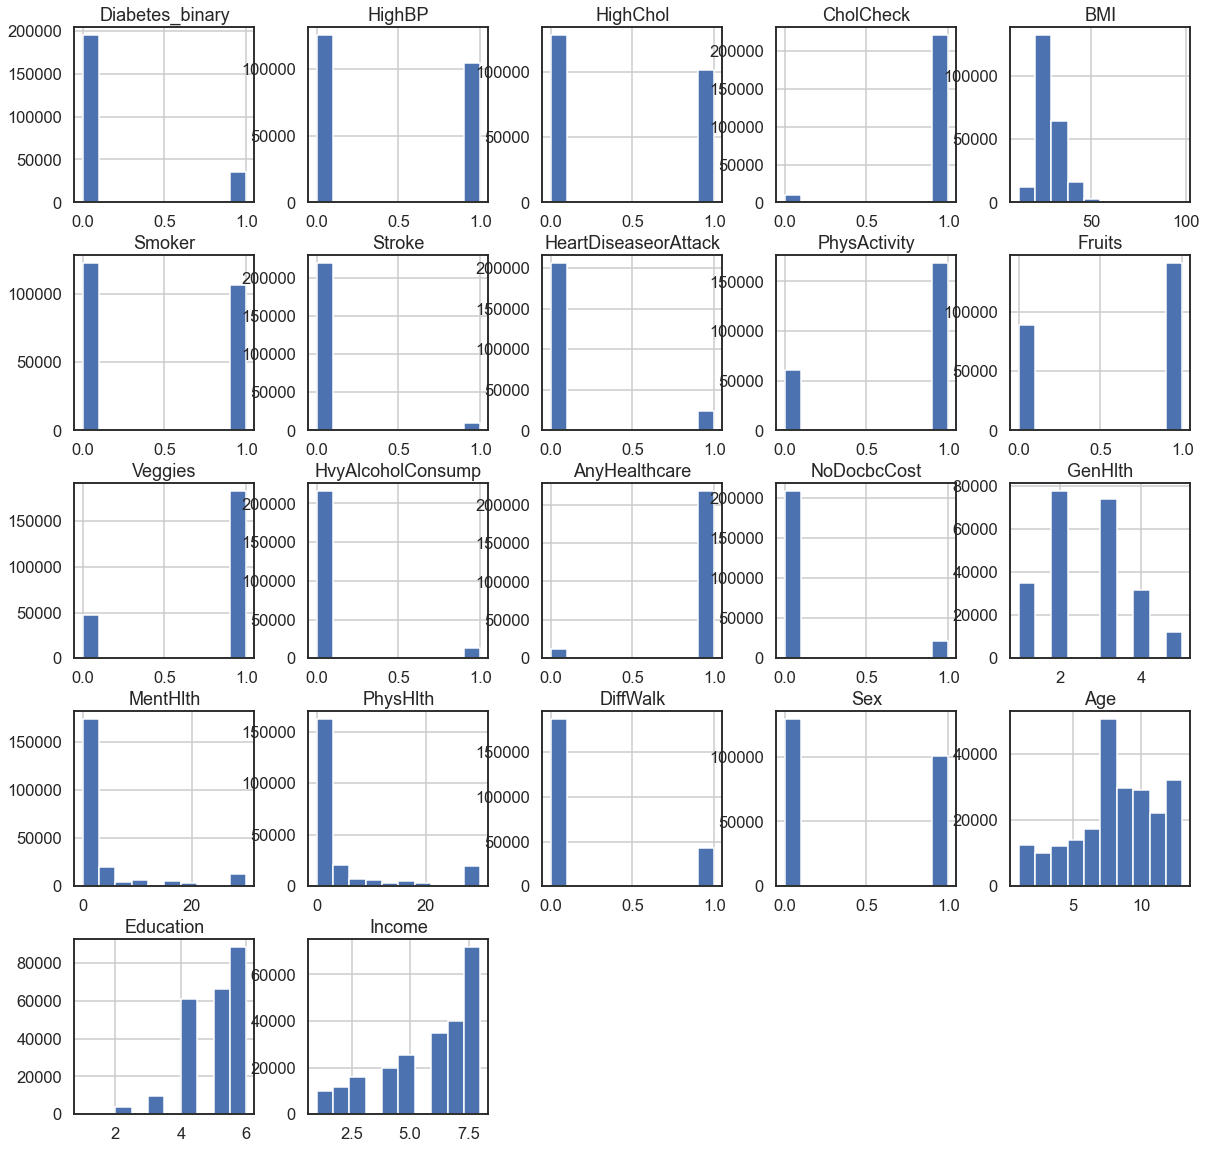

In [146]:
data.hist(figsize=(20,20));

#### Further description of the features 

1. Diabetic : 0 = no diabetes 1 = pre-diabetes or diabetes
2. HighBP : 0 = no high BP 1 = high BP
3. HighChol : 0 = no high cholesterol 1 = high cholesterol
4. CholCheck : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5. BMI : Body Mass Index
6. Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7. Stroke : (Ever told) you had a stroke. 0 = no 1 = yes
8. HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9. PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes
10. Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes
11. Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes
12. HvyAlcoholConsump : (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
13. AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
14. NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
15. GenHlth : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth : days of poor mental health scale 1-30 days
17. PhysHlth : physical illness or injury days in past 30 days scale 1-30
18. DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
19. Sex : 0 = female 1 = male
20. Age : 13-level age category 1 = 18-24 0 = 60-64 13 = 80 or older

!!!!!!!!!!!!!Don't forget to drop the Income and education columns!!!!!!!!!!!!


In [147]:
def col_rename(data):
    data = data.rename(columns = {'Diabetes_binary': 'Diabetic', 'Diabetes_012': 'Diabetic'})
    return data

data = col_rename(data)

In [148]:
classifiers = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "DiffWalk",
    "Sex",
    "Age",
    "MentHlth",
    "PhysHlth",
]

regressor = [
    "BMI",
]

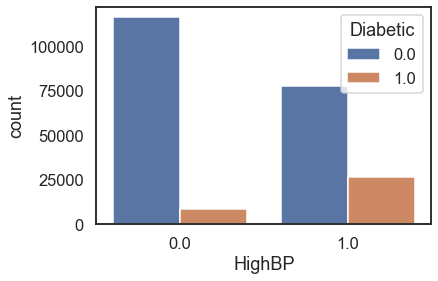

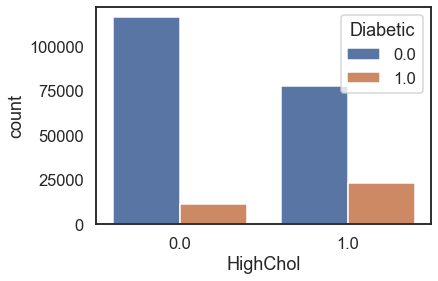

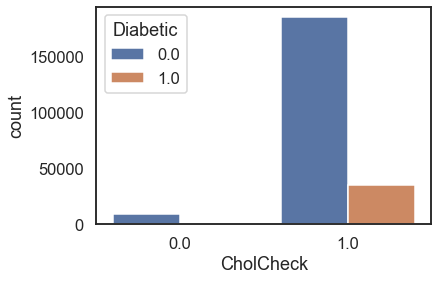

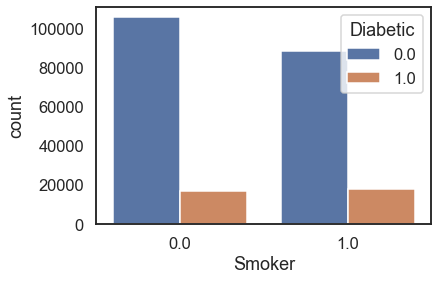

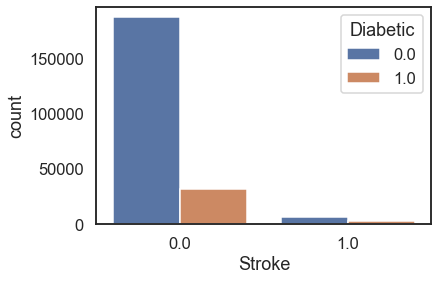

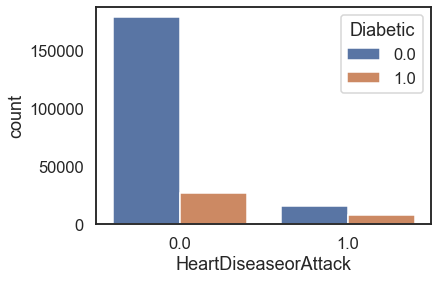

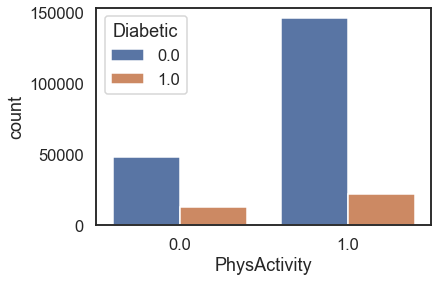

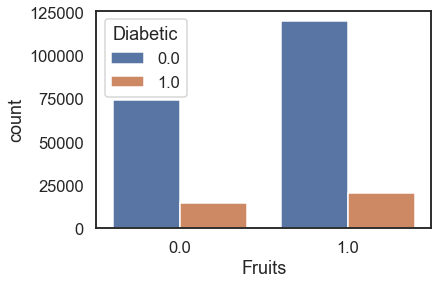

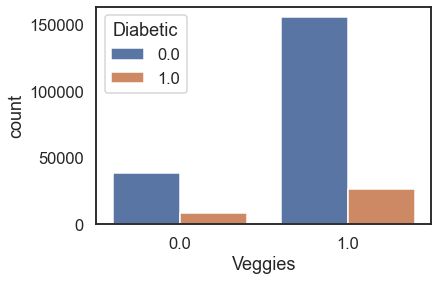

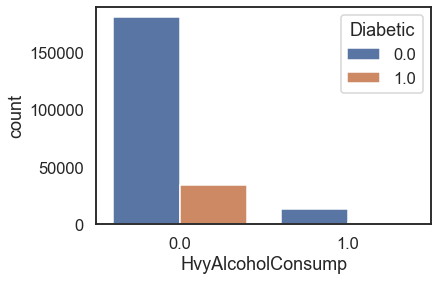

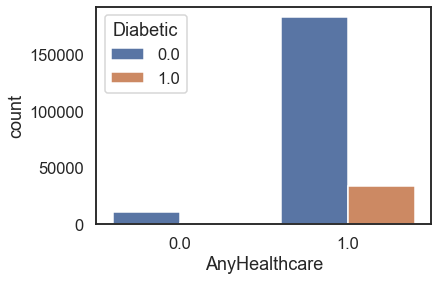

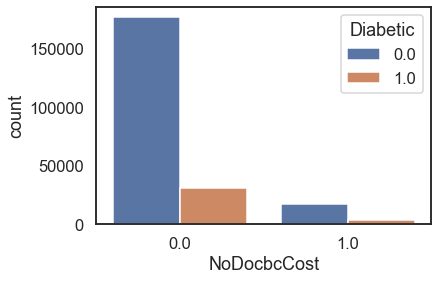

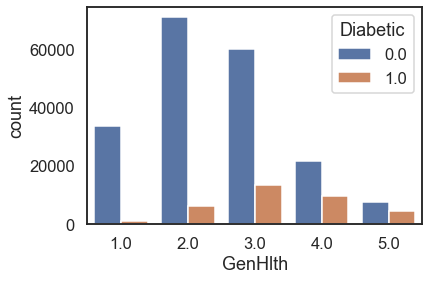

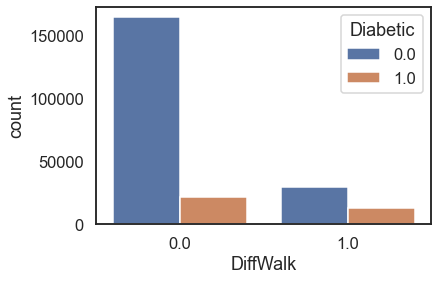

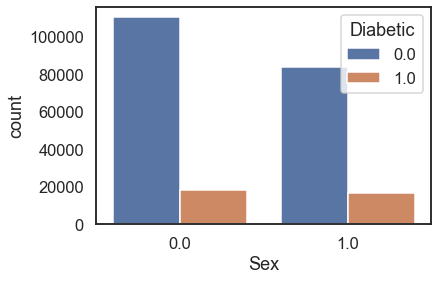

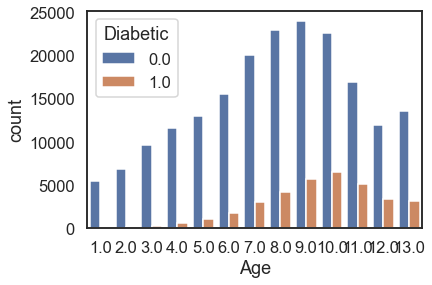

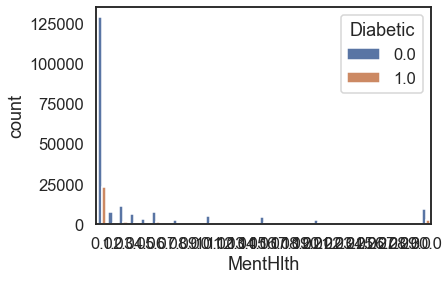

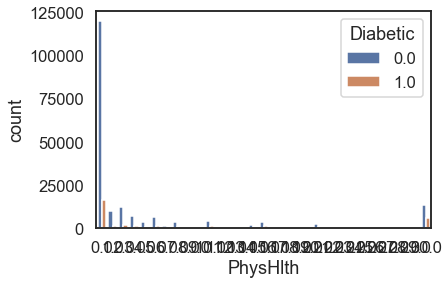

In [149]:
for feature in classifiers:
    sns.countplot(data=data, x=feature, hue="Diabetic")
    plt.show()

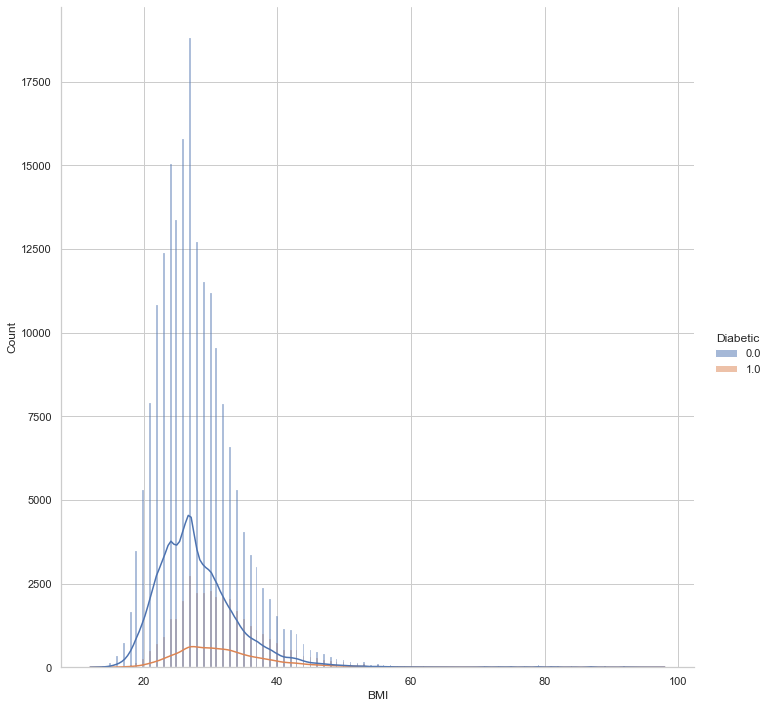

In [150]:
for feature in regressor:
    sns.set(style="whitegrid", color_codes=True)
    sns.displot(data=data, x=feature, kde=True, hue="Diabetic", height=10)
    plt.show()

!!!!!!after on top, Explain the meaning of the ranges of those BMI readings!!!!!

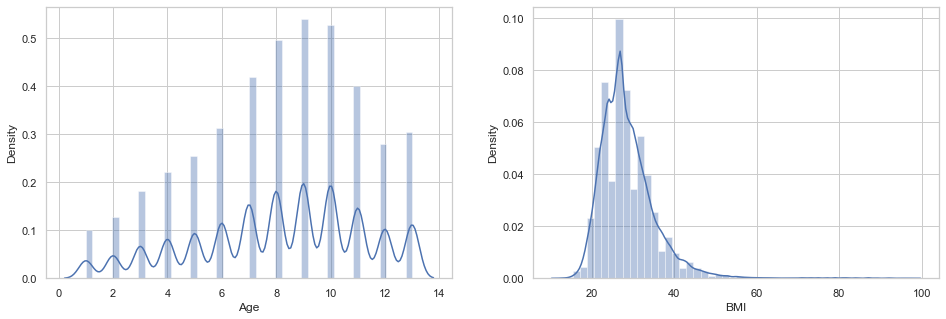

In [151]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Age'])
plt.subplot(1,2,2)
sns.distplot(data['BMI'])
plt.show()

#### Checking the relationship between diabetic patients and BMI

!!!!!!!!Don't forget to mention the BMI ranges!!!!!!!!!
!!!!!!do write ups!!!!

In [160]:
diabetic_patients1 = data[(data["Diabetic"]==1)]["Diabetic"].value_counts()
BMI_count1 = data[(data["Diabetic"]==1) & (data["BMI"]<18)]["Diabetic"].value_counts()

print(diabetic_patients1)
print(BMI_count1)

1.0    35097
Name: Diabetic, dtype: int64
1.0    86
Name: Diabetic, dtype: int64


In [161]:
diabetic_patients2 = data[(data["Diabetic"]==1)]["Diabetic"].value_counts()
BMI_count2 = data[(data["Diabetic"]==1) & (data["BMI"]>=18) & ((data["BMI"]<25))]["Diabetic"].value_counts()

print(diabetic_patients2)
print(BMI_count2)

1.0    35097
Name: Diabetic, dtype: int64
1.0    3993
Name: Diabetic, dtype: int64


In [162]:
diabetic_patients3 = data[(data["Diabetic"]==1)]["Diabetic"].value_counts()
BMI_count3 = data[(data["Diabetic"]==1) & (data["BMI"]>=25)]["Diabetic"].value_counts()

print(diabetic_patients3)
print(BMI_count3)

1.0    35097
Name: Diabetic, dtype: int64
1.0    31018
Name: Diabetic, dtype: int64


#### Checking the relationship between Not-diabetic patients and BMI

!!!!!!!!Don't forget to mention the BMI ranges!!!!!!!!!
!!!!!!do write ups!!!!

In [163]:
diabetic_patients4 = data[(data["Diabetic"]==0)]["Diabetic"].value_counts()
BMI_count4 = data[(data["Diabetic"]==0) & (data["BMI"]<18)]["Diabetic"].value_counts()

print(diabetic_patients4)
print(BMI_count4)

0.0    194377
Name: Diabetic, dtype: int64
0.0    1223
Name: Diabetic, dtype: int64


In [156]:
diabetic_patients5 = data[(data["Diabetic"]==0)]["Diabetic"].value_counts()
BMI_count5 = data[(data["Diabetic"]==0) & (data["BMI"]>=18) & ((data["BMI"]<25))]["Diabetic"].value_counts()

print(diabetic_patients5)
print(BMI_count5)

0.0    194377
Name: Diabetic, dtype: int64
0.0    56592
Name: Diabetic, dtype: int64


In [157]:
diabetic_patients6 = data[(data["Diabetic"]==0)]["Diabetic"].value_counts()
BMI_count6 = data[(data["Diabetic"]==0) & (data["BMI"]>=25)]["Diabetic"].value_counts()

print(diabetic_patients6)
print(BMI_count6)

0.0    194377
Name: Diabetic, dtype: int64
0.0    136562
Name: Diabetic, dtype: int64


#### Checking the relationship between diabetic patients and HighBP

!!!!!!!!Don't forget to mention the BP ranges!!!!!!!!!
!!!!!!do write ups!!!!

In [168]:
Bp1 = data[(data["Diabetic"]==1) & (data["HighBP"]==1)]["Diabetic"].value_counts()
Bp2 = data[(data["Diabetic"]==1) & (data["HighBP"]==0)]["Diabetic"].value_counts()

print(Bp1)
print(Bp2)

1.0    26405
Name: Diabetic, dtype: int64
1.0    8692
Name: Diabetic, dtype: int64


#### Checking the relationship between diabetic patients and HighChol

!!!!!!!!Don't forget to mention the cholesterol ranges!!!!!!!!!
!!!!!!do write ups!!!!

In [171]:
ch1 = data[(data["Diabetic"]==1) & (data["HighChol"]==1)]["Diabetic"].value_counts()
ch2 = data[(data["Diabetic"]==1) & (data["HighChol"]==0)]["Diabetic"].value_counts()

print(ch1)
print(ch2)

1.0    23496
Name: Diabetic, dtype: int64
1.0    11601
Name: Diabetic, dtype: int64


#### Checking the relationship between diabetic patients and HighChol

!!!!!!!!Don't forget to mention the Smoker ranges!!!!!!!!!
!!!!!!do write ups!!!!

In [187]:
sm1 = data[(data["Diabetic"]==1) & (data["Smoker"]==1)]["Diabetic"].value_counts()
sm2 = data[(data["Diabetic"]==1) & (data["Smoker"]==0)]["Diabetic"].value_counts()

print(sm1)
print(sm2)

1.0    18223
Name: Diabetic, dtype: int64
1.0    16874
Name: Diabetic, dtype: int64


#### Checking the relationship between diabetic patients and Heavy Alcohol consumption

!!!!!!!!Don't forget to mention the Heavy Alcohol consumption ranges!!!!!!!!!
!!!!!!do write ups!!!!

1.0    832
Name: Diabetic, dtype: int64
1.0    34265
Name: Diabetic, dtype: int64


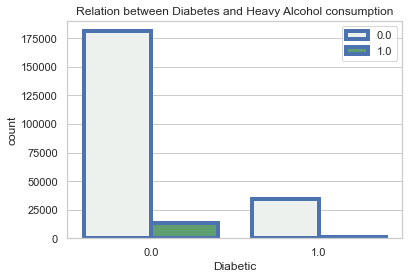

In [188]:
sns.countplot(x="Diabetic", data=data,hue="HvyAlcoholConsump",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heavy Alcohol consumption")
plt.legend();

al1 = data[(data["Diabetic"]==1) & (data["HvyAlcoholConsump"]==1)]["Diabetic"].value_counts()
al2 = data[(data["Diabetic"]==1) & (data["HvyAlcoholConsump"]==0)]["Diabetic"].value_counts()

print(al1)
print(al2)

#### Checking the relationship between diabetic patients and Heart Disease or Attack

!!!!!!!!Don't forget to mention the Heart Disease or Attack ranges!!!!!!!!!
!!!!!!do write ups!!!!

1.0    7856
Name: Diabetic, dtype: int64
1.0    27241
Name: Diabetic, dtype: int64


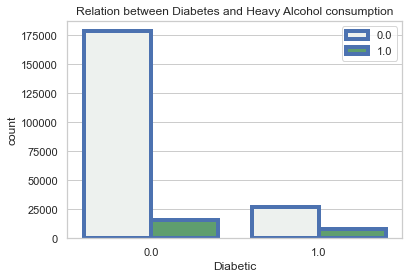

In [189]:
sns.countplot(x="Diabetic", data=data,hue="HeartDiseaseorAttack",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heavy Alcohol consumption")
plt.legend();

ha1 = data[(data["Diabetic"]==1) & (data["HeartDiseaseorAttack"]==1)]["Diabetic"].value_counts()
ha2 = data[(data["Diabetic"]==1) & (data["HeartDiseaseorAttack"]==0)]["Diabetic"].value_counts()

print(ha1)
print(ha2)

#### Checking the relationship between diabetic patients and physical Activity

!!!!!!!!Don't forget to mention the physical Activity ranges!!!!!!!!!
!!!!!!do write ups!!!!

1.0    22059
Name: Diabetic, dtype: int64
1.0    13038
Name: Diabetic, dtype: int64


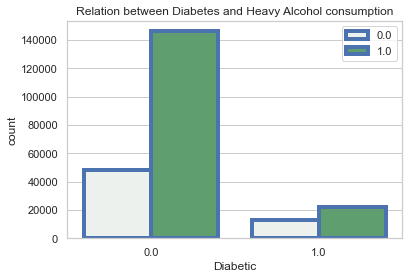

In [190]:
sns.countplot(x="Diabetic", data=data,hue="PhysActivity",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heavy Alcohol consumption")
plt.legend();

ph1 = data[(data["Diabetic"]==1) & (data["PhysActivity"]==1)]["Diabetic"].value_counts()
ph2 = data[(data["Diabetic"]==1) & (data["PhysActivity"]==0)]["Diabetic"].value_counts()

print(ph1)
print(ph2)

#### Checking the relationship between diabetic patients and Vegetables intake

!!!!!!!!Don't forget to mention the Vegetables intake ranges!!!!!!!!!
!!!!!!do write ups!!!!

1.0    26495
Name: Diabetic, dtype: int64
1.0    8602
Name: Diabetic, dtype: int64


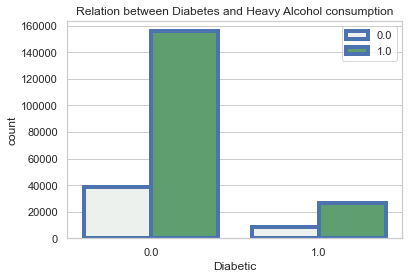

In [191]:
sns.countplot(x="Diabetic", data=data,hue="Veggies",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heavy Alcohol consumption")
plt.legend();

v1 = data[(data["Diabetic"]==1) & (data["Veggies"]==1)]["Diabetic"].value_counts()
v2 = data[(data["Diabetic"]==1) & (data["Veggies"]==0)]["Diabetic"].value_counts()

print(v1)
print(v2)

#### Checking the relationship between diabetic patients and Fruits intake

!!!!!!!!Don't forget to mention the Fruits intake ranges!!!!!!!!!
!!!!!!do write ups!!!!

1.0    20505
Name: Diabetic, dtype: int64
1.0    14592
Name: Diabetic, dtype: int64


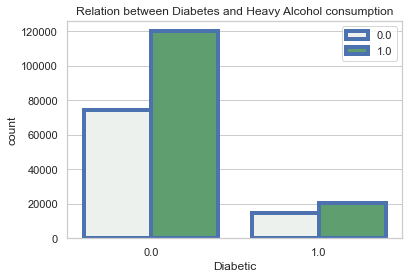

In [192]:
sns.countplot(x="Diabetic", data=data,hue="Fruits",lw=4,ec="b",color="g");
plt.title("Relation between Diabetes and Heavy Alcohol consumption")
plt.legend();

f1 = data[(data["Diabetic"]==1) & (data["Fruits"]==1)]["Diabetic"].value_counts()
f2 = data[(data["Diabetic"]==1) & (data["Fruits"]==0)]["Diabetic"].value_counts()

print(f1)
print(f2)

### Visualize Data

## Correlation Testing:
Correlation test is used to evaluate the association between two or more variables.

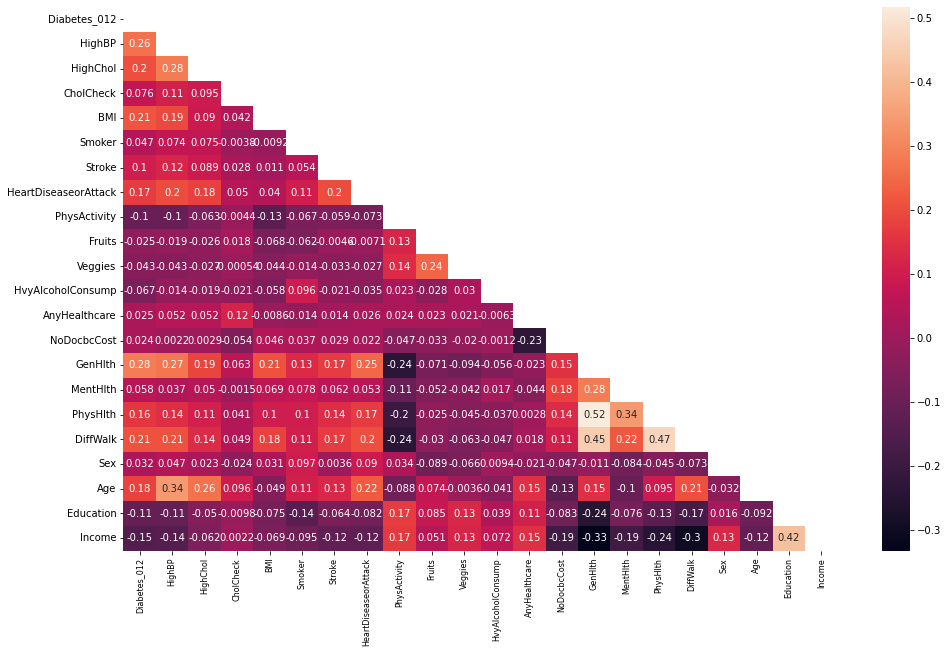

In [11]:
mask = np.zeros_like(data.corr()) 
triangle_indeces=np.triu_indices_from(mask)
mask[triangle_indeces] =True
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

In [206]:
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.6.0
    Uninstalling imbalanced-learn-0.6.0:
      Successfully uninstalled imbalanced-learn-0.6.0


In [211]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\phiez\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1








==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [209]:
y=data['Diabetic']
X=data.drop('Diabetic',axis=1)



from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

ImportError: cannot import name '_deprecate_positional_args' from 'imblearn.utils._validation' (C:\Users\phiez\Anaconda3\lib\site-packages\imblearn\utils\_validation.py)

### Implement Forward Selection